In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics 


In [25]:
data = pd.read_csv('/Users/macbook/Desktop/my/myprojectsds/insurance.csv')

# Top five rows of dataset

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Last five rows of dataset

In [82]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,0,3,10600.5483
1334,18,1,31.92,0,0,4,2205.9808
1335,18,1,36.85,0,0,2,1629.8335
1336,21,1,25.80,0,0,1,2007.9450
1337,61,1,29.07,0,1,3,29141.3603


# Number of rows and columns

In [28]:
number_of_rows=data.shape[0]
number_of_columns=data.shape[1]
print('Number of rows:',number_of_rows)
print('Number of columns:',number_of_columns)

Number of rows: 1338
Number of columns: 7


# Information about our dataset

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Checking Null values

In [30]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Statistics about the dataset

In [31]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Converting categorical values to numerical values

In [32]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [34]:
data['sex']=data['sex'].map({'male':0,'female':1})
data['smoker']=data['smoker'].map({'no':0,'yes':1})
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [35]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [37]:
data['region']=data['region'].map({'southwest':1,
                    'southeast':2,
                    'northwest':3,
                    'northeast':4})

In [38]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


# Train Test Split

In [39]:
data.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [40]:
X = data.drop(['charges'],axis=1)

In [41]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,4
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,1


In [42]:
y = data['charges']

In [43]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
X_train

,age,sex,bmi,children,smoker,region
560,46,1,19.950,2,0,3
1285,47,1,24.320,0,0,4
1142,52,1,24.860,0,0,2
969,39,1,34.320,5,0,2
486,54,1,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,1,31.350,4,0,4
1130,39,1,23.870,5,0,2
1294,58,0,25.175,0,0,4
860,37,1,47.600,2,1,1


In [52]:
X_test

,age,sex,bmi,children,smoker,region
764,45,1,25.175,2,0,4
887,36,1,30.020,0,0,3
890,64,1,26.885,0,1,3
1293,46,0,25.745,3,0,3
259,19,0,31.920,0,1,3
...,...,...,...,...,...,...
109,63,0,35.090,0,1,2
575,58,1,27.170,0,0,3
535,38,0,28.025,1,0,4
543,54,1,47.410,0,1,2


# Model Training

In [54]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

# Prediction on test data

In [56]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rfr.predict(X_test)
y_pred4 = gbr.predict(X_test)

df1 = pd.DataFrame({'Real':y_test,
                   'LinearRegression':y_pred1,
                   'SVM':y_pred2,
                   'RandomForest':y_pred3,
                   'GradientBoosting':y_pred4}
                  )

In [57]:
df1

,Real,LinearRegression,SVM,RandomForest,GradientBoosting
764,9095.06825,8924.407244,9548.268369,10599.877994,11001.128629
887,5272.17580,7116.295018,9492.536262,5372.124782,5840.174656
890,29330.98315,36909.013521,9648.745707,28299.153576,28001.980112
1293,9301.89355,9507.874691,9555.049189,10546.437218,9745.291602
259,33750.29180,27013.350008,9420.451630,34643.156902,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.889239,47457.741506,45431.423211
575,12222.89830,11814.555568,9625.420724,12068.155757,12465.025294
535,6067.12675,7638.107736,9504.186517,6479.082119,6974.336525
543,63770.42801,40959.081722,9605.000400,46518.674893,47862.047791


# Visual comparison

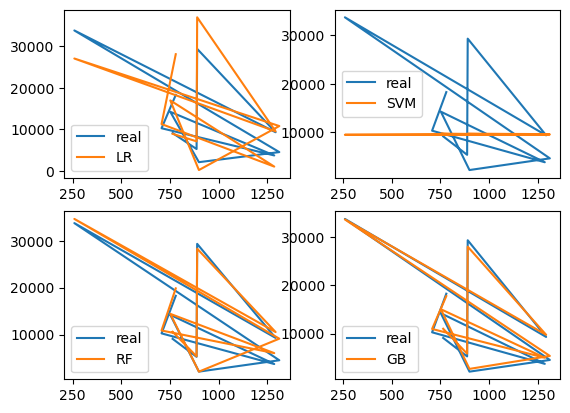

In [86]:
plt.subplot(221)
plt.plot(df1['Real'].iloc[0:11],label='real')
plt.plot(df1['LinearRegression'].iloc[0:11],label='LR')
plt.legend()
plt.subplot(222)
plt.plot(df1['Real'].iloc[0:11],label='real')
plt.plot(df1['SVM'].iloc[0:11],label='SVM')
plt.legend()
plt.subplot(223)
plt.plot(df1['Real'].iloc[0:11],label='real')
plt.plot(df1['RandomForest'].iloc[0:11],label='RF')
plt.legend()
plt.subplot(224)
plt.plot(df1['Real'].iloc[0:11],label='real')
plt.plot(df1['GradientBoosting'].iloc[0:11],label='GB')

plt.legend()

# Evaluating the Algorithm

## R squared (higher is better)

In [68]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [73]:
print(score1)
print(score2)
print(score3)
print(score4)

0.7833463107364539
-0.07229793131123086
0.8625074894564664
0.8779726251291786


## MAE (lower is better)

In [75]:
score_LR = metrics.mean_absolute_error(y_test,y_pred1)
score_SVM = metrics.mean_absolute_error(y_test,y_pred2)
score_RF = metrics.mean_absolute_error(y_test,y_pred3)
score_GB = metrics.mean_absolute_error(y_test,y_pred4)

In [77]:
print(score_LR)
print(score_SVM)
print(score_RF)
print(score_GB)

4186.508898366427
8592.439160260994
2530.115284350778
2447.951558054584


# Predict  charges for new customer

In [89]:
data = {'age' : 20,
       'sex' : 1,
       'bmi':39.1,
       'children':0,
       'smoker' : 0,
       'region' : 1}

In [91]:
new_df = pd.DataFrame(data,index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,20,1,39.1,0,0,1


In [92]:
gbr.predict(new_df)

array([2561.11046391])

# Saving the model

In [94]:
gbr = GradientBoostingRegressor()
gbr.fit(X,y)

GradientBoostingRegressor()

In [95]:
import joblib

In [96]:
joblib.dump(gbr,'model_gbr')

['model_gbr']

In [97]:
model = joblib.load('model_gbr')

In [107]:
new=model.predict(new_df)
new

array([2107.36573057])

In [109]:
print('Predicted charge for the new customer is :', round(new[0],5))

Predicted charge for the new customer is : 2107.36573
